In [ ]:
import numpy as np
from skimage import exposure, io, color, img_as_float
import matplotlib.pyplot as plt

np.random.seed(1000)        #presudo random value

[[0.65358959 0.11500694 0.95028286]
 [0.4821914  0.87247454 0.21233268]
 [0.04070962 0.39719446 0.2331322 ]]


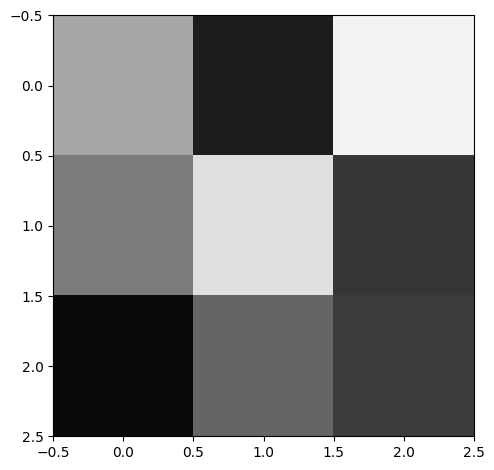

In [ ]:
i = np.random.rand(3,3)
print(i)
io.imshow(i)

[[0.95358959 0.41500694 1.25028286]
 [0.7821914  1.17247454 0.51233268]
 [0.34070962 0.69719446 0.5331322 ]]


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


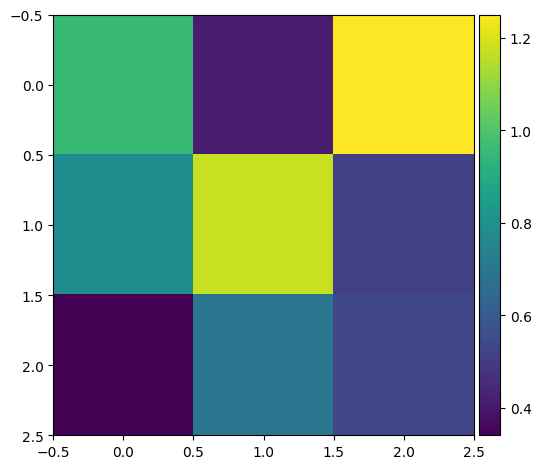

In [ ]:
#point processing with addition
i_add  = i + 0.3
print(i_add)
io.imshow(i_add)

[[0.95358959 0.41500694 1.        ]
 [0.7821914  1.         0.51233268]
 [0.34070962 0.69719446 0.5331322 ]]


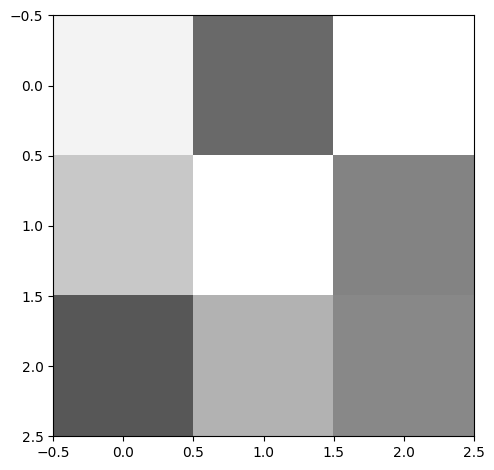

In [ ]:
#as some intensity goes beyond 1 which needs to change [0,1]
#greater than 1 will be convert to 1

i_add[i_add > 1.0] = 1.0                    # i_add = np.clip(i_add,0,1)
print(i_add)
io.imshow(i_add)

[[0.35358959 0.         0.65028286]
 [0.1821914  0.57247454 0.        ]
 [0.         0.09719446 0.        ]]


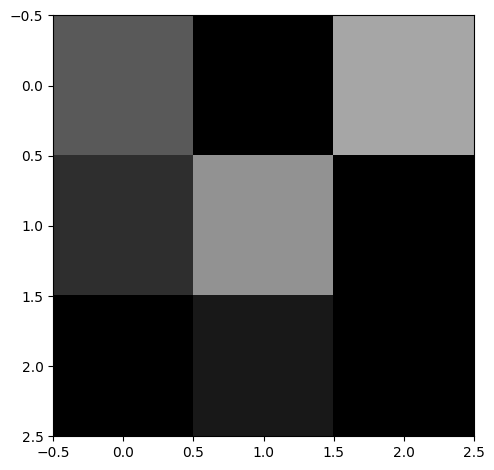

In [ ]:
#point processing with substraction
i_sub = i - 0.3
i_sub = np.clip(i_sub,0,1)
print(i_sub)
io.imshow(i_sub)

[[0.19607688 0.03450208 0.28508486]
 [0.14465742 0.26174236 0.0636998 ]
 [0.01221289 0.11915834 0.06993966]]


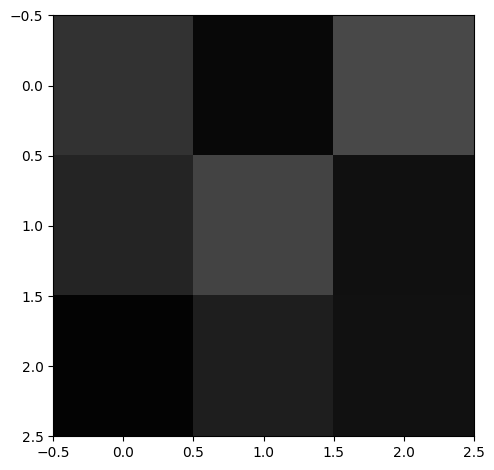

In [ ]:
#point processing with multiplication
i_mult = i * 0.3
i_mult = np.clip(i_mult,0,1)
print(i_mult)
io.imshow(i_mult)

[[1.         0.38335648 1.        ]
 [1.         1.         0.7077756 ]
 [0.13569875 1.         0.77710732]]


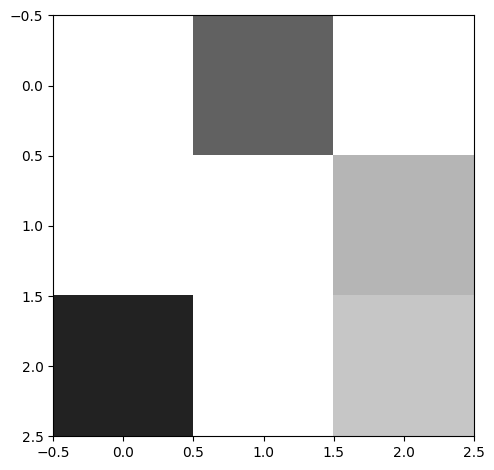

In [ ]:
#point processing with divison
i_div = i / 0.3
i_div = np.clip(i_div,0,1)
print(i_div)
io.imshow(i_div)

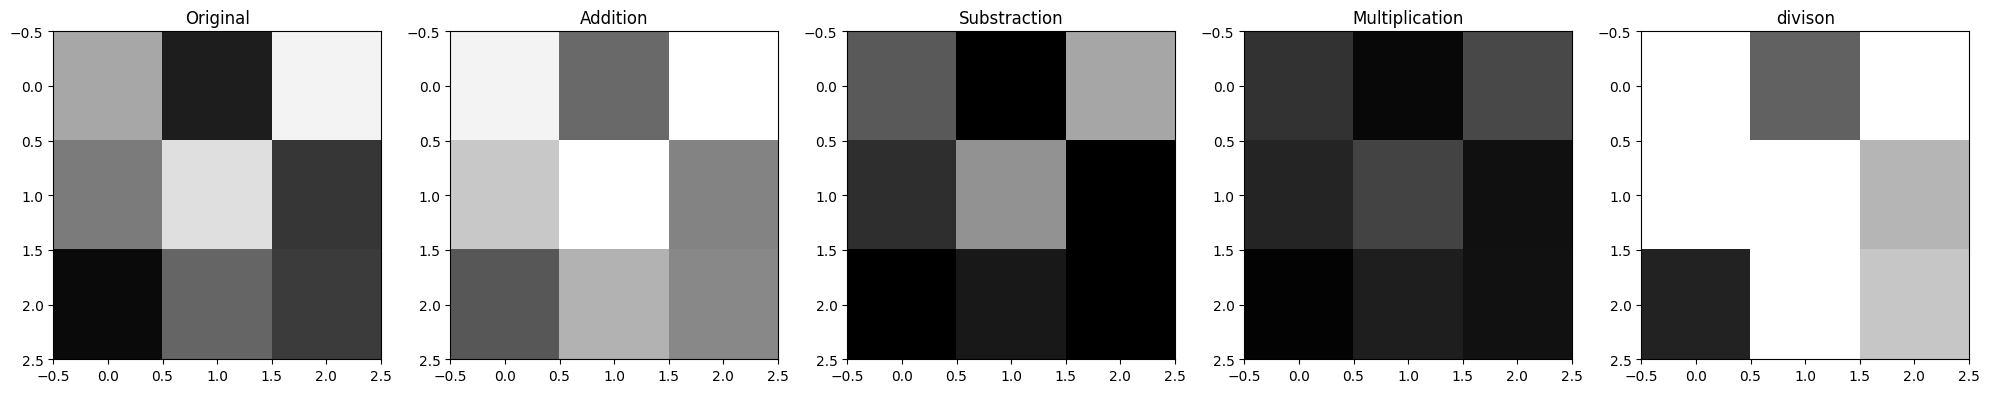

In [ ]:
#ploting all the arithmetic operation

plt.figure(figsize=(20, 20))
plt.subplot(1,5,1)
io.imshow(i)
plt.title('Original')

plt.subplot(1,5,2)
io.imshow(i_add)
plt.title('Addition')

plt.subplot(1,5,3)
io.imshow(i_sub)
plt.title('Substraction')

plt.subplot(1,5,4)
io.imshow(i_mult)
plt.title('Multiplication')

plt.subplot(1,5,5)
io.imshow(i_div)
plt.title('divison')
plt.show()

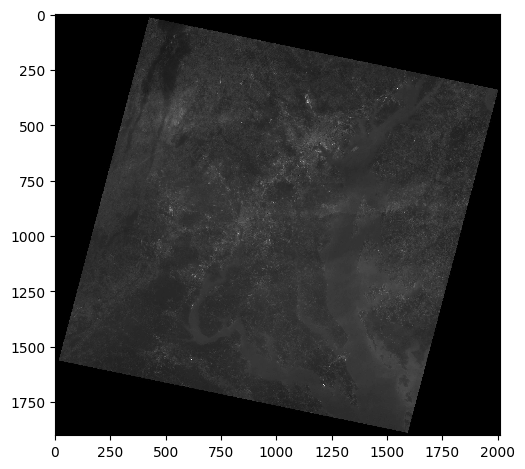

In [ ]:
satalite_img = img_as_float(io.imread('/content/landsat_down.jpeg'))
io.imshow(satalite_img)

In [ ]:
print(satalite_img)
print()
print(f'Height pixel number = {satalite_img.shape[0]}')
print(f'Weidth pixel number = {satalite_img.shape[1]}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Height pixel number = 1901
Weidth pixel number = 2010


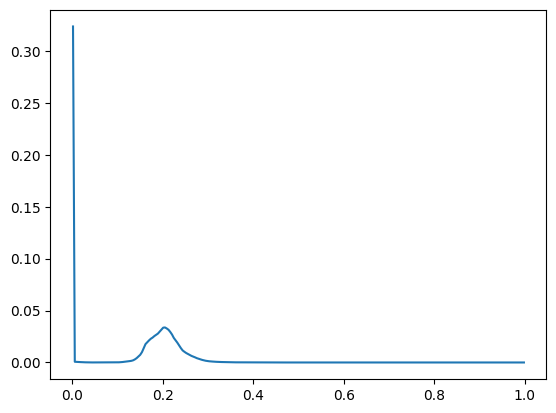

In [ ]:
#histogram of intensity vs count of intensity

count, intensity_bins = exposure.histogram(satalite_img, nbins=256, normalize=True)
plt.plot(intensity_bins, count)      # x = bins and y = count of that bin

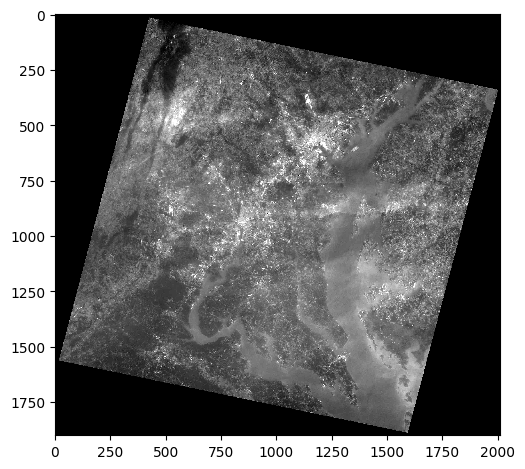

In [ ]:
'''
contrast streching formula, s = C1(r-C2)
theory part
'''

satalite_img_streched = 4*(satalite_img-0.1)
satalite_img_streched = np.clip(satalite_img_streched,0,1)
io.imshow(satalite_img_streched)

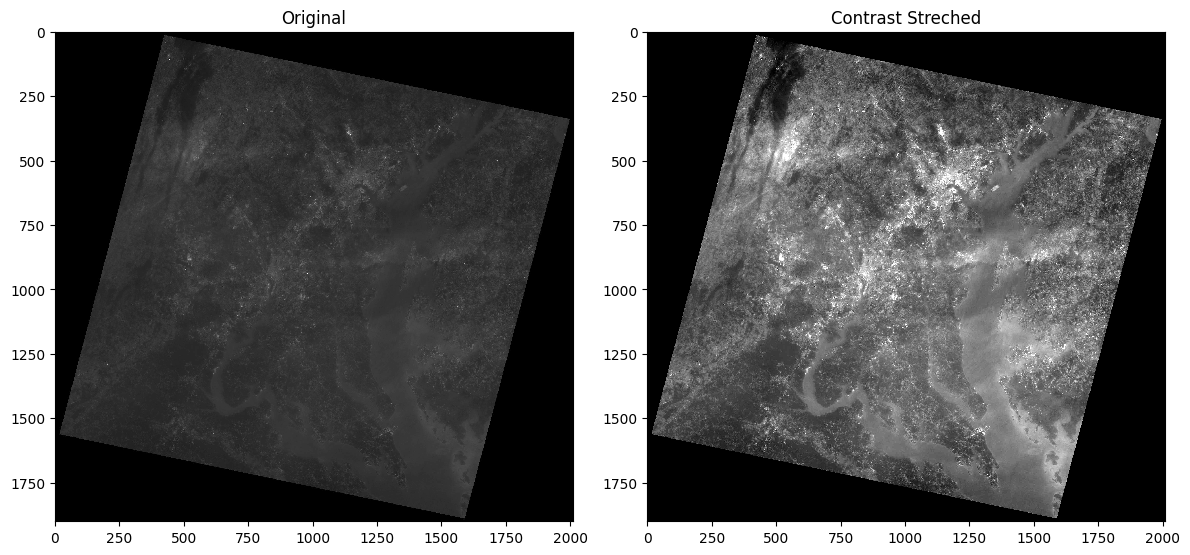

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
io.imshow(satalite_img)
plt.title('Original')

plt.subplot(1,2,2)
io.imshow(satalite_img_streched)
plt.title('Contrast Streched')
plt.show()

Text(0.5, 1.0, 'After')

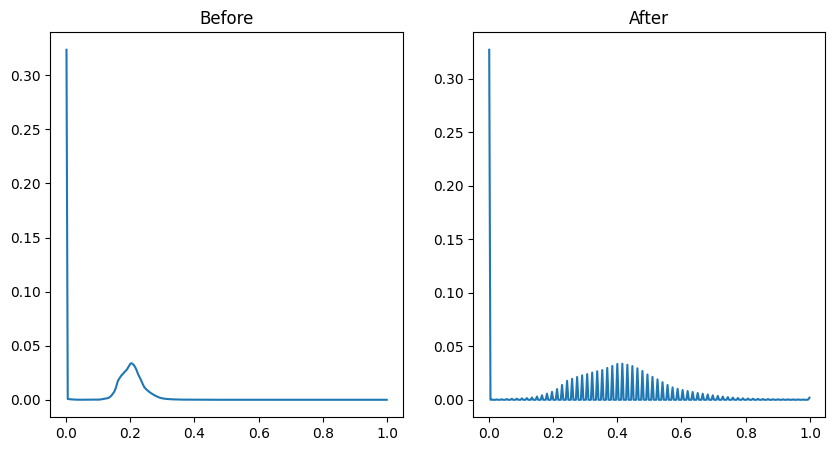

In [ ]:
#histogram before and after contrast streching
count, intensity_bins = exposure.histogram(satalite_img, nbins=256, normalize=True)
count_streched, intensity_bins_streched = exposure.histogram(satalite_img_streched, nbins=256, normalize=True)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(intensity_bins, count)
plt.title('Before')

plt.subplot(1,2,2)
plt.plot(intensity_bins_streched, count_streched)
plt.title('After')

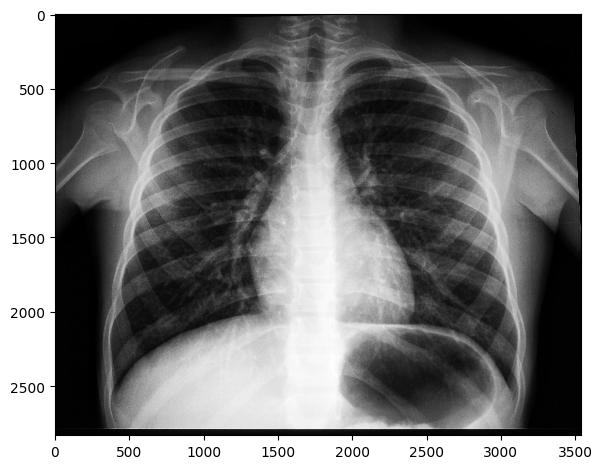

In [ ]:
xray_img = img_as_float(io.imread('/content/xray.jpeg'))
xray_img = color.rgb2gray(xray_img)
io.imshow(xray_img)

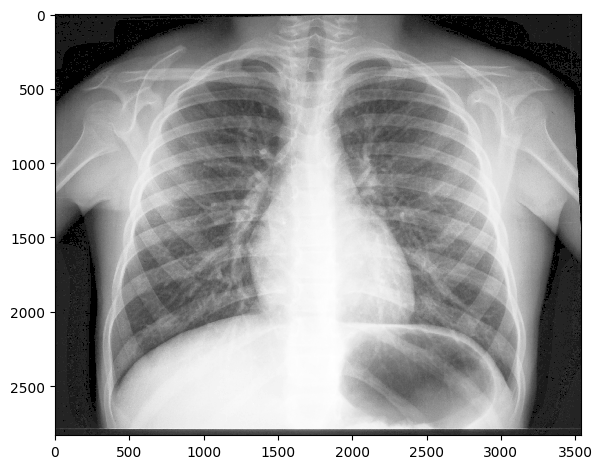

In [ ]:
'''
power law transformation, s= c*(r^gamma)
'''

gamma = 0.4
xray_img_gamma = 1 * (xray_img**gamma)
xray_img_gamma = np.clip(xray_img_gamma,0,1)
io.imshow(xray_img_gamma)

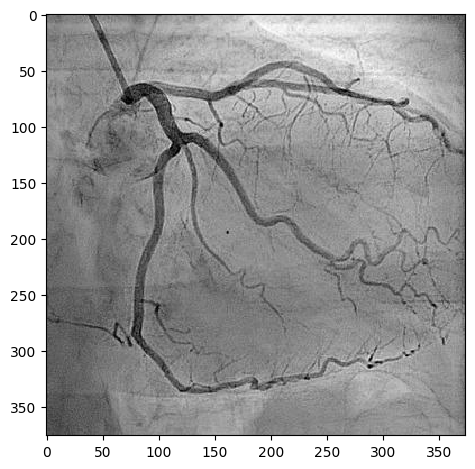

In [ ]:
'''
negative img convertion, s= 1-r
'''

angio_img = img_as_float(io.imread('/content/angiogram_bw.jpeg'))
io.imshow(angio_img)

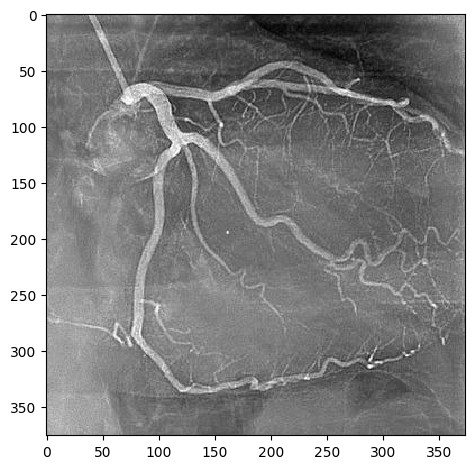

In [ ]:
neg_angio_img = 1 - angio_img
io.imshow(neg_angio_img)

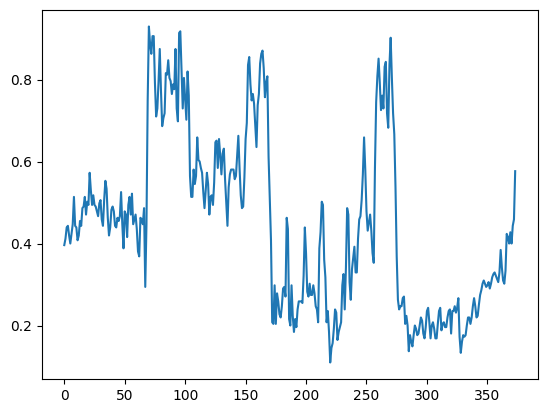

In [ ]:
plt.plot(neg_angio_img[70,:])

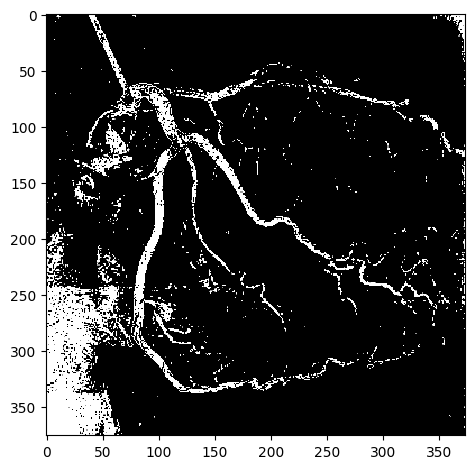

In [ ]:
lower_thrushold = 0.6
higher_thrushold = 0.8

neg_angio_img[neg_angio_img < lower_thrushold] = 0
neg_angio_img[neg_angio_img > higher_thrushold] = 0

neg_angio_img[(neg_angio_img > lower_thrushold) & (neg_angio_img < higher_thrushold)] = 1.0
io.imshow(neg_angio_img)